<a href="https://colab.research.google.com/github/SudipKumarSah-0934/1040_Sudip_Kumar_sah/blob/master/OBV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# from google.colab import files # Use to load data on Google Colab
# files.upload() # Use to load data on Google Colab
#Store the data
df = pd.read_csv('/content/new_BATBC.csv')
#Set the date as the index
df['Date'] = pd.to_datetime(df['date'])
df.set_index('Date', inplace=True)
df=df.sort_index()

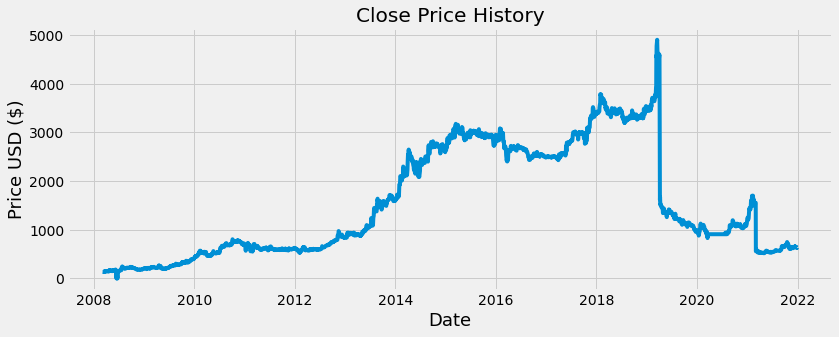

In [13]:
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df['closing_price'],  label='Close') 
plt.title('Close Price History')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

In [14]:
OBV = []
OBV.append(0)
for i in range(1, len(df.closing_price)):
    if df.closing_price[i] > df.closing_price[i-1]: #If the closing price is above the prior close price 
          OBV.append(OBV[-1] + df.volume[i]) #then: Current OBV = Previous OBV + Current Volume
    elif df.closing_price[i] < df.closing_price[i-1]:
          OBV.append( OBV[-1] - df.volume[i])
    else:
          OBV.append(OBV[-1])

In [15]:
df['OBV'] = OBV
df['OBV_EMA'] = df['OBV'].ewm(com=20).mean()
#Show the data
df

,Unnamed: 0,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume,OBV,OBV_EMA
Date,,,,,,,,,,,,,,
2008-03-06,8364,3/6/2008,BATBC,132.5,134.0,131.0,131.3,132.1,131.3,651,13.2276,99450,0,0.000000e+00
2008-03-09,8363,3/9/2008,BATBC,131.2,133.0,130.0,132.5,131.2,132.1,462,10.5991,80400,-80400,-4.118049e+04
2008-03-09,8362,3/9/2008,BATBC,131.2,133.0,130.0,132.5,131.2,132.1,462,10.5991,80400,-80400,-5.489643e+04
2008-03-10,8361,3/10/2008,BATBC,130.5,132.0,130.1,131.9,130.4,131.2,334,6.1500,46900,-127300,-7.434278e+04
2008-03-11,8360,3/11/2008,BATBC,131.4,135.0,129.4,130.1,132.0,130.4,803,17.4313,132200,4900,-5.691127e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,11337,12/26/2021,BATBC,627.2,639.0,625.1,639.0,627.2,635.9,3794,130.1790,207369,20350284,2.129883e+07
2021-12-27,11336,12/27/2021,BATBC,623.8,633.7,622.5,626.3,623.8,627.2,3848,104.8550,167286,20182998,2.124570e+07
2021-12-28,11335,12/28/2021,BATBC,637.2,640.0,624.0,624.0,637.2,623.8,2242,55.7930,88461,20271459,2.119931e+07


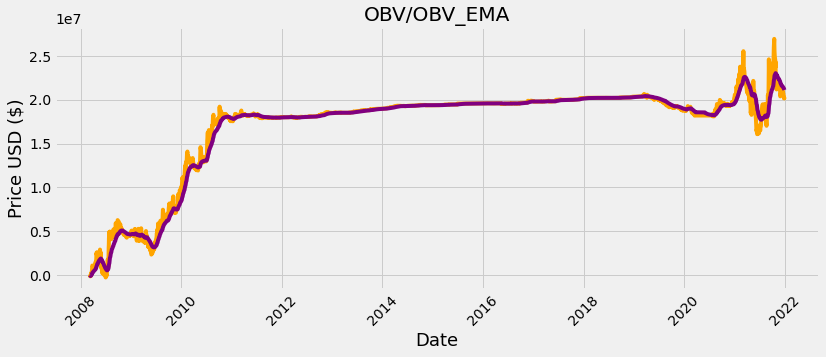

In [16]:
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
#plt.plot( df['Close'],  label='Close')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.plot( df['OBV'],  label='OBV', color= 'orange')
plt.plot( df['OBV_EMA'],  label='OBV_EMA', color= 'purple')
plt.xticks(rotation=45) 
plt.title('OBV/OBV_EMA')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

In [17]:
def buy_sell(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1 #A flag for the trend upward/downward
  #Loop through the length of the data set
  for i in range(0,len(signal)):
    #if OBV > OBV_EMA  and flag != 1 then buy else sell
      if signal[col1][i] > signal[col2][i] and flag != 1:
          sigPriceBuy.append(signal['closing_price'][i])
          sigPriceSell.append(np.nan)
          flag = 1
      #else  if OBV < OBV_EMA  and flag != 0 then sell else buy
      elif signal[col1][i] < signal[col2][i] and flag != 0:    
          sigPriceSell.append(signal['closing_price'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
      #else   OBV == OBV_EMA  so append NaN 
      else: 
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)


In [18]:
x = buy_sell(df, 'OBV','OBV_EMA' )
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]
#Show the data frame
df

,Unnamed: 0,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,,,,,,,
2008-03-06,8364,3/6/2008,BATBC,132.5,134.0,131.0,131.3,132.1,131.3,651,13.2276,99450,0,0.000000e+00,NaN,NaN
2008-03-09,8363,3/9/2008,BATBC,131.2,133.0,130.0,132.5,131.2,132.1,462,10.5991,80400,-80400,-4.118049e+04,NaN,131.2
2008-03-09,8362,3/9/2008,BATBC,131.2,133.0,130.0,132.5,131.2,132.1,462,10.5991,80400,-80400,-5.489643e+04,NaN,NaN
2008-03-10,8361,3/10/2008,BATBC,130.5,132.0,130.1,131.9,130.4,131.2,334,6.1500,46900,-127300,-7.434278e+04,NaN,NaN
2008-03-11,8360,3/11/2008,BATBC,131.4,135.0,129.4,130.1,132.0,130.4,803,17.4313,132200,4900,-5.691127e+04,132.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,11337,12/26/2021,BATBC,627.2,639.0,625.1,639.0,627.2,635.9,3794,130.1790,207369,20350284,2.129883e+07,NaN,NaN
2021-12-27,11336,12/27/2021,BATBC,623.8,633.7,622.5,626.3,623.8,627.2,3848,104.8550,167286,20182998,2.124570e+07,NaN,NaN
2021-12-28,11335,12/28/2021,BATBC,637.2,640.0,624.0,624.0,637.2,623.8,2242,55.7930,88461,20271459,2.119931e+07,NaN,NaN


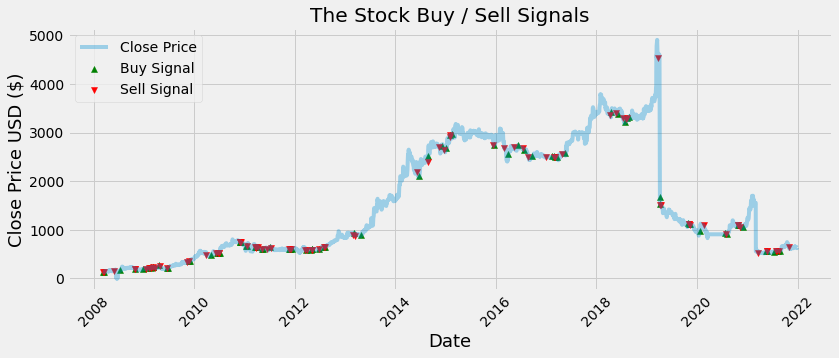

In [20]:
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( df['closing_price'],  label='Close Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45)
plt.title('The Stock Buy / Sell Signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()